In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

plt.rc('font', family="Cambria")

#! 根据模型修改
# ppi, ppi-woppm, rnn, rnn-woppm
model_name = "ppi"

In [4]:
results_dir = f"./results/{model_name}"
values = defaultdict(list)
layers_num = len(os.listdir(results_dir))
for fn in ['emb'] + list(range(layers_num-1)):
    lines = open(os.path.join(results_dir, f"{str(fn)}"+".eval"), "r").readlines()
    for line in lines:
        orga, avg, std, _min, _max = line.strip().split()
        values[orga].append(float(avg))


findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


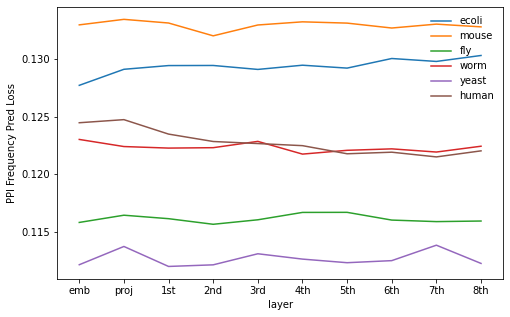

In [5]:
# fig, subs = plt.subplots(1, 2, figsize=(10, 5))
plt.figure(figsize=(8, 5))
fig = plt.subplot()

xs = list(range(1, 11))
xticks = ["emb", "proj", "1st", "2nd", "3rd", "4th", "5th", "6th", "7th", "8th"]
colors = ["#407088", "#a37eba"]

xs = xs[:layers_num]
xticks = xticks[:layers_num]
xlim = layers_num + 0.5


fig.set_xlim(0.5, xlim, 1)
# fig.set_ylim(0, 1.05)
fig.set_xlabel("layer")
fig.set_ylabel("PPI Frequency Pred Loss")
fig.set_xticks(range(1, layers_num+1), xticks)

for orga in values:
    fig.plot(xs, values[orga], label=orga)

fig.legend(frameon=False)
    
plt.savefig(f"./figure-{model_name}.pdf", bbox_inches='tight')